# <p style="text-align: center;"> Final Project - Introduction to Data Science</p>
# <p style="text-align: center;"> <b> Data Pre-processing </b></p>
---

## Member Information
| Name              | ID       |
|-------------------|----------|
|Tran Đinh Quang    | 21127406 |
|Nguyen Hong Hanh   | 21127503 |
|Đo Quoc Tri  | 21127556 |
| Nguyen Khanh Nhan | 21127657         |


## Table of contents



---

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
FILE_PATH = '../data/raw.csv'
df = pd.read_csv(FILE_PATH)

df.head()

,datetime,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,sunriseEpoch,sunset,sunsetEpoch,moonphase,conditions,description,icon,stations,source,severerisk
0,2009-09-27,1253984400,87.9,73.5,78.9,100.9,73.5,82.5,76.5,93.0,...,1254004923,17:46:17,1254048377,0.27,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,['48900099999'],obs,NaN
1,2009-09-28,1254070800,84.8,75.3,79.6,94.0,75.3,82.7,75.7,88.4,...,1254091320,17:45:39,1254134739,0.30,Overcast,Cloudy skies throughout the day.,cloudy,['48900099999'],obs,NaN
2,2009-09-29,1254157200,84.5,77.1,80.5,93.5,77.1,84.6,76.2,87.0,...,1254177718,17:45:01,1254221101,0.34,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,['48900099999'],obs,NaN
3,2009-09-30,1254243600,87.9,74.6,79.3,100.2,74.6,82.4,76.3,91.7,...,1254264116,17:44:24,1254307464,0.37,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,['48900099999'],obs,NaN
4,2009-10-01,1254330000,89.7,75.3,80.9,100.5,75.3,85.4,76.3,87.2,...,1254350514,17:43:46,1254393826,0.40,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,['48900099999'],obs,NaN


# Add - Remove columns

**Numeric data:**

*   'datetime', 'dateEpoch': the purpose of the problem is to rely on environmental data to predict the weather at that specific time. Therefore, when it comes to time, we will use a column for  month for analysis instead of storing a specific date
*   'precip', 'precipprob', 'precipcover': remove because, for the data of precipitation, we have a column 'preciptype' with only 2 values: 'rain' or null, and others are equal 0 when 'preciptype' is null. It's possible to consider merging these columns into one 'preciptype' column with boolean data type (0: null, 1: rain)
*   'sunrise', 'sunset', 'sunriseEpoch', 'sunsetEpoch': for the sunrise and sunset times, we will store as the number of seconds since 00:00 so that it will be convenient when analyze the relationships between these two columns and the remaining columns in the dataframe
*   'snow', 'snowdepth': as the data is obtained from Ho Chi Minh City, Vietnam, a city where snowfall never occurs, we will remove columns related to snow with a high number of missing values
*   'windgust', 'severerisk': remove due to a high percentage of missing values (90%) and lack of meaningful relevance to the posed problem

In [32]:
df['month'] = pd.to_datetime(df['datetime']).dt.month

# df['preciptype'][115] là chỗ ['rain'], để == ['rain'] thì nó không nhận ra?
df['preciptype'] = [1 if i == df['preciptype'][115] else 0 for i in df['preciptype']]

df['sunrise'] = pd.to_datetime(df['sunrise'], format='%H:%M:%S')

df['sunrise'] = df['sunrise'].dt.hour * 3600 + df['sunrise'].dt.minute * 60 + df['sunrise'].dt.second

df['sunset'] = pd.to_datetime(df['sunset'], format='%H:%M:%S')

df['sunset'] = df['sunset'].dt.hour * 3600 + df['sunset'].dt.minute * 60 + df['sunset'].dt.second

drop_columns = ['datetime', 'datetimeEpoch','precip', 'precipprob', 'precipcover', 'windgust', 'sunriseEpoch', 'sunsetEpoch', 'snow', 'snowdepth', 'severerisk']

df = df.drop(columns=drop_columns, axis=1)

df.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,preciptype,windspeed,...,uvindex,sunrise,sunset,moonphase,conditions,description,icon,stations,source,month
0,87.9,73.5,78.9,100.9,73.5,82.5,76.5,93.0,0,18.3,...,NaN,20523,63977,0.27,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,['48900099999'],obs,9
1,84.8,75.3,79.6,94.0,75.3,82.7,75.7,88.4,0,13.9,...,NaN,20520,63939,0.30,Overcast,Cloudy skies throughout the day.,cloudy,['48900099999'],obs,9
2,84.5,77.1,80.5,93.5,77.1,84.6,76.2,87.0,0,16.1,...,NaN,20518,63901,0.34,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,['48900099999'],obs,9
3,87.9,74.6,79.3,100.2,74.6,82.4,76.3,91.7,0,17.2,...,NaN,20516,63864,0.37,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,['48900099999'],obs,9
4,89.7,75.3,80.9,100.5,75.3,85.4,76.3,87.2,0,12.8,...,NaN,20514,63826,0.40,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,['48900099999'],obs,10


**Categorical data**

*   'description', 'conditons': remove because we only need one column with good classification properties to serve as the label ('icon')
*   'stations': remove as its values are complex and not helpful for this project
*   'source': remove as it has only one unique value

In [33]:
drop_columns = ['description', 'conditions', 'stations', 'source']

df = df.drop(columns=drop_columns, axis=1)

df.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,preciptype,windspeed,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,icon,month
0,87.9,73.5,78.9,100.9,73.5,82.5,76.5,93.0,0,18.3,...,87.9,5.6,NaN,NaN,NaN,20523,63977,0.27,partly-cloudy-day,9
1,84.8,75.3,79.6,94.0,75.3,82.7,75.7,88.4,0,13.9,...,90.4,6.6,NaN,NaN,NaN,20520,63939,0.30,cloudy,9
2,84.5,77.1,80.5,93.5,77.1,84.6,76.2,87.0,0,16.1,...,82.1,6.6,NaN,NaN,NaN,20518,63901,0.34,partly-cloudy-day,9
3,87.9,74.6,79.3,100.2,74.6,82.4,76.3,91.7,0,17.2,...,90.0,5.7,NaN,NaN,NaN,20516,63864,0.37,partly-cloudy-day,9
4,89.7,75.3,80.9,100.5,75.3,85.4,76.3,87.2,0,12.8,...,70.8,6.6,NaN,NaN,NaN,20514,63826,0.40,partly-cloudy-day,10


# Detect outlier

In [34]:
df.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,preciptype,windspeed,...,pressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,month
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,...,4999.000000,5000.000000,5000.000000,4904.000000,4904.000000,4904.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,91.041220,76.14564,82.354120,99.919340,76.942880,87.187940,73.726820,77.205960,0.62780,12.067560,...,1008.960392,56.483300,6.055920,205.420310,17.744168,7.201876,20974.707800,64603.808400,0.483794,6.501000
std,3.281317,3.21651,2.659416,5.709696,4.945019,5.232159,3.837916,9.359366,0.48344,3.317442,...,2.042986,14.138278,1.174452,59.917768,5.181503,2.019694,884.759487,1006.387513,0.288521,3.480693
min,73.600000,44.50000,71.700000,73.600000,41.200000,71.700000,54.100000,49.500000,0.00000,4.500000,...,1000.500000,12.900000,3.200000,15.000000,1.300000,1.000000,19777.000000,62796.000000,0.000000,1.000000
25%,89.600000,74.37500,80.700000,96.400000,74.375000,83.575000,71.800000,70.800000,0.00000,9.800000,...,1007.600000,46.700000,5.800000,155.975000,13.500000,6.000000,20388.000000,63715.750000,0.250000,3.000000
50%,91.400000,76.90000,82.400000,100.300000,76.900000,86.800000,74.800000,77.900000,1.00000,11.400000,...,1008.800000,55.400000,6.100000,204.700000,17.700000,7.000000,20608.000000,64989.500000,0.480000,6.000000
75%,93.200000,78.70000,84.100000,103.900000,78.700000,90.400000,76.500000,84.300000,1.00000,13.900000,...,1010.300000,65.900000,6.400000,255.400000,22.000000,9.000000,21733.000000,65337.000000,0.750000,10.000000
max,100.500000,85.90000,90.500000,119.700000,100.300000,106.900000,81.400000,99.800000,1.00000,31.100000,...,1015.800000,100.000000,47.600000,324.200000,28.000000,10.000000,22618.000000,66006.000000,0.980000,12.000000


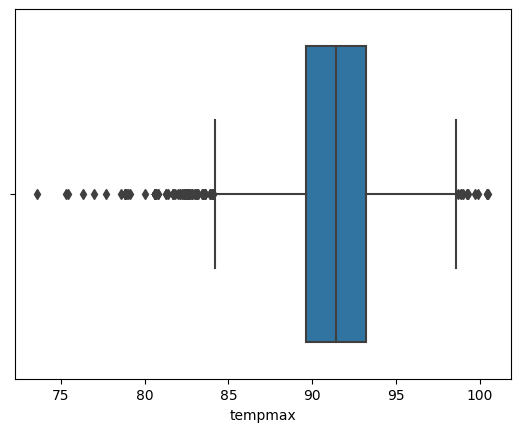

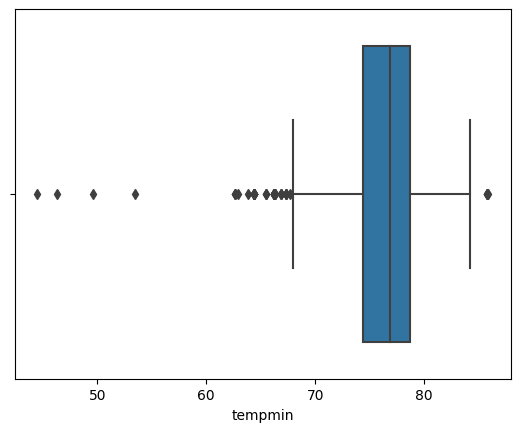

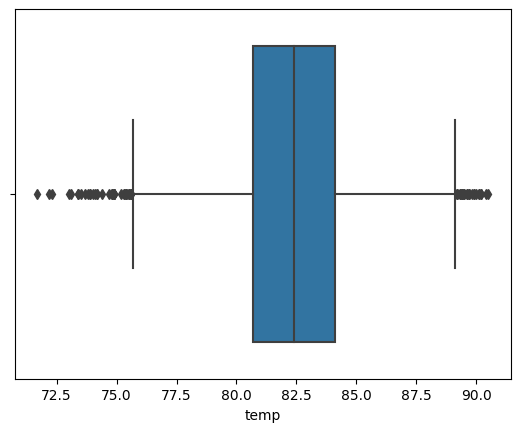

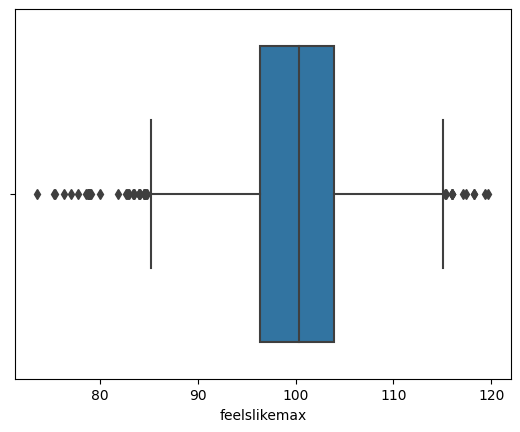

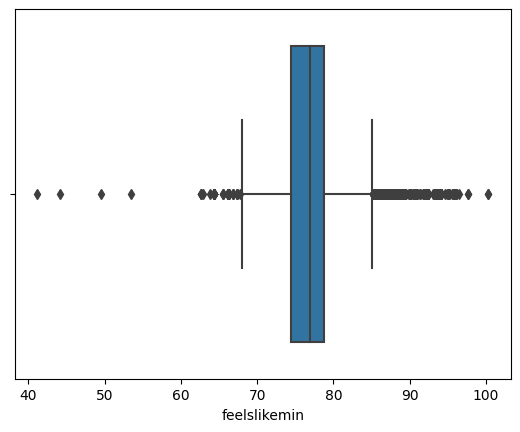

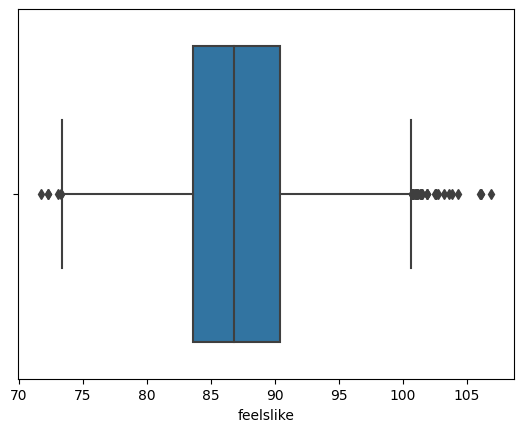

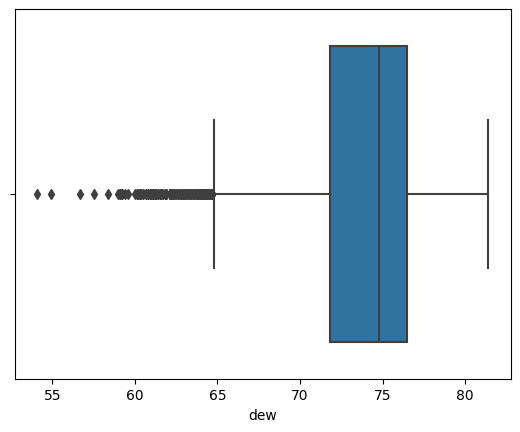

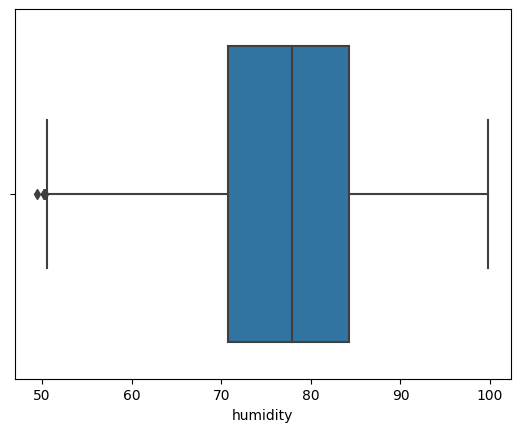

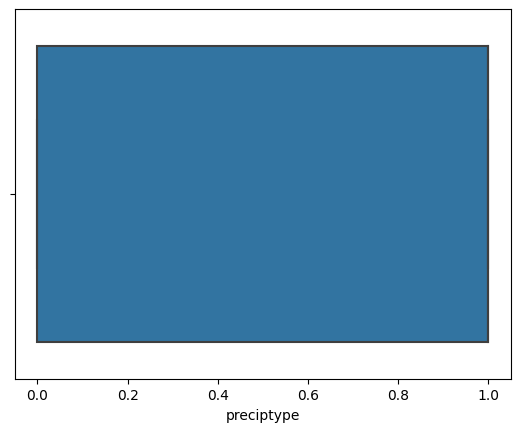

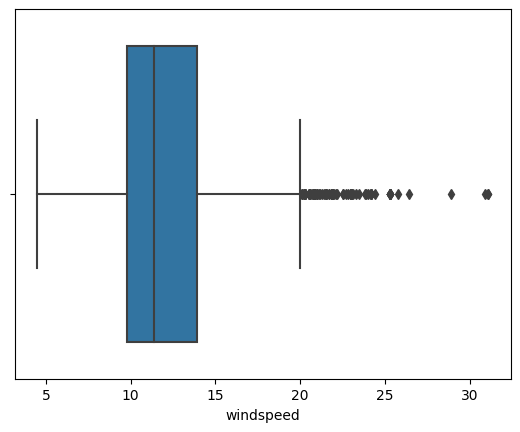

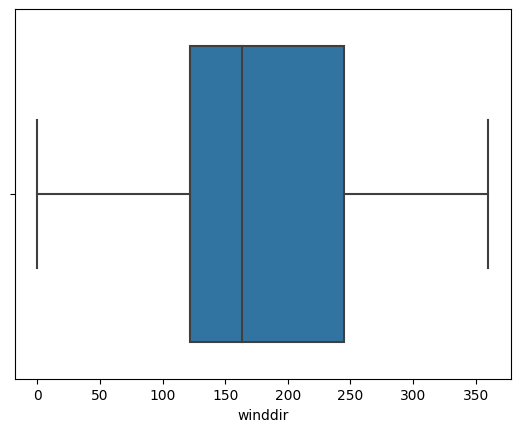

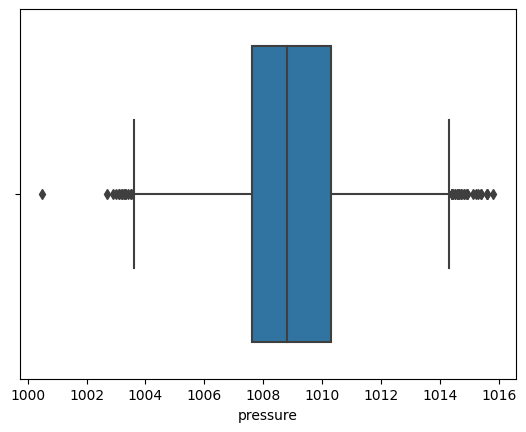

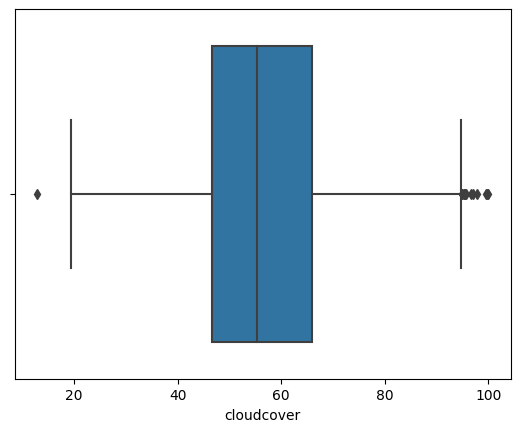

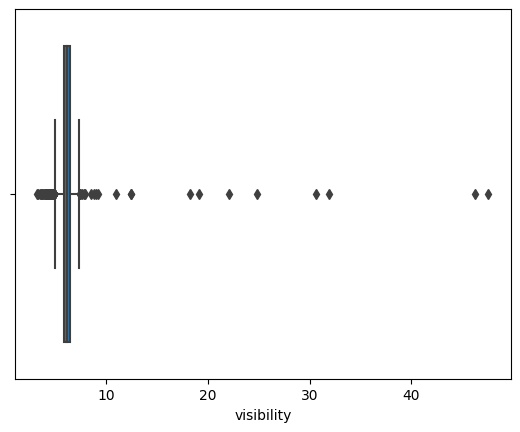

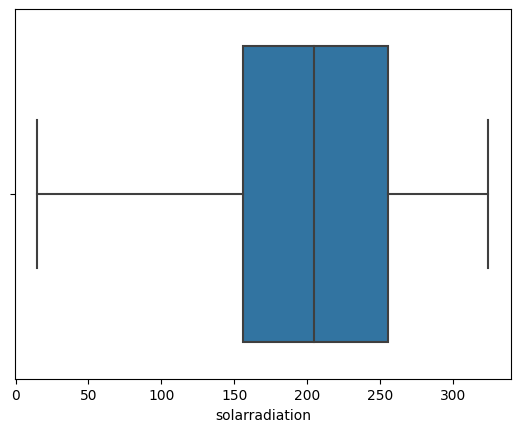

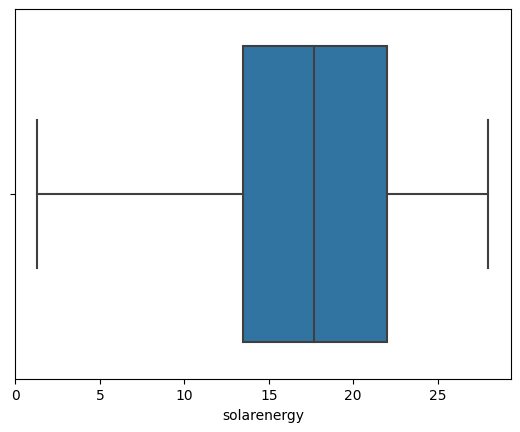

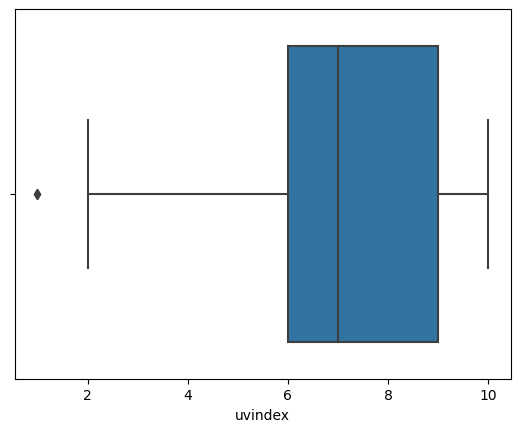

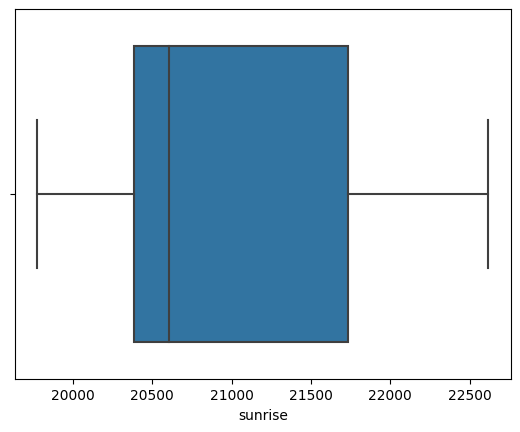

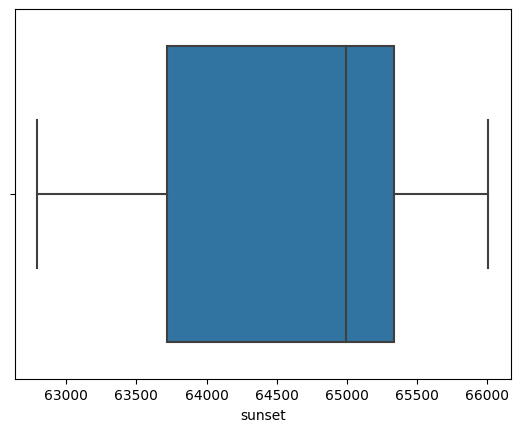

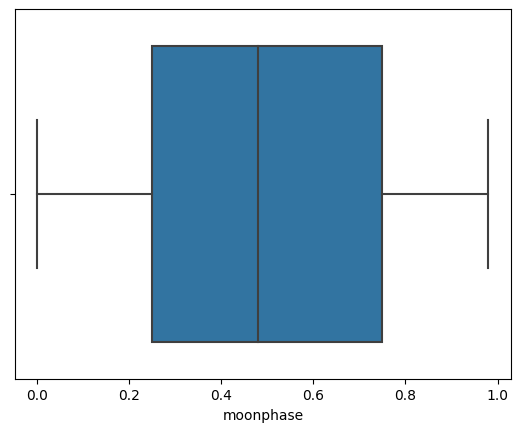

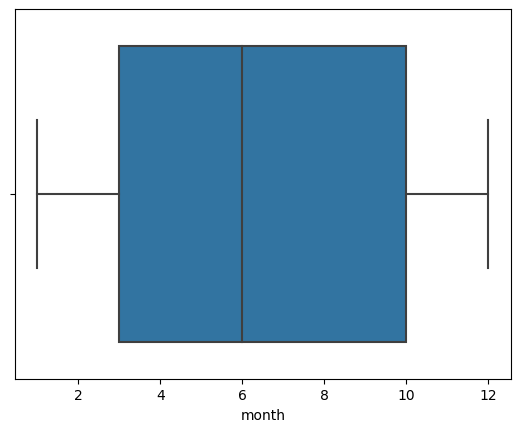

In [35]:
numeric_cols = df.drop(columns=['icon'])

for col in numeric_cols:
    sns.boxplot(x = df[col])
    plt.show()

Since there are quite many features with outliers and no domain knowledge available, only extreme outliers will be removed

In [36]:
columns = ['tempmax', 'tempmin', 'feelslikemax', 'feelslikemin', 'dew',  'windspeed', 'visibility']

threshold = 3

for column in columns:
    z_scores = stats.zscore(df[column])
    df = df[(z_scores < threshold) & (z_scores > -threshold)]

      tempmax  tempmin  temp  feelslikemax  feelslikemin  feelslike   dew  \
0        87.9     73.5  78.9         100.9          73.5       82.5  76.5   
1        84.8     75.3  79.6          94.0          75.3       82.7  75.7   
2        84.5     77.1  80.5          93.5          77.1       84.6  76.2   
3        87.9     74.6  79.3         100.2          74.6       82.4  76.3   
4        89.7     75.3  80.9         100.5          75.3       85.4  76.3   
...       ...      ...   ...           ...           ...        ...   ...   
4992     92.6     80.4  83.8         111.9          87.4       95.1  79.3   
4993     93.2     80.3  85.0         112.7          87.4       97.5  79.3   
4994     93.2     80.5  84.3         113.5          87.9       97.1  79.9   
4998     95.0     75.2  85.5         116.0          75.2       98.0  79.7   
4999     91.4     77.0  81.7         110.8          77.0       88.1  79.0   

      humidity  preciptype  windspeed  ...  cloudcover  visibility  \
0    

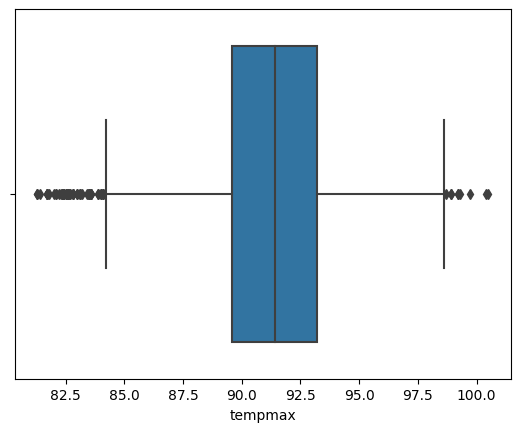

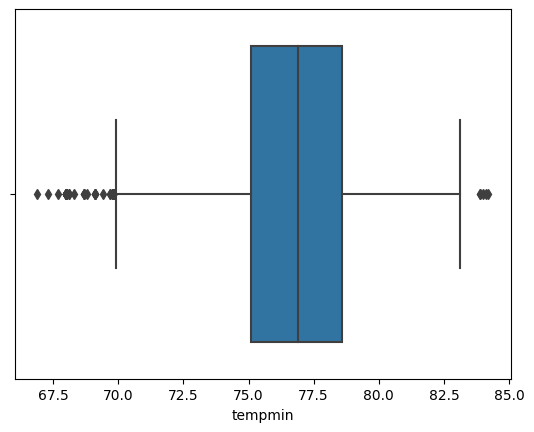

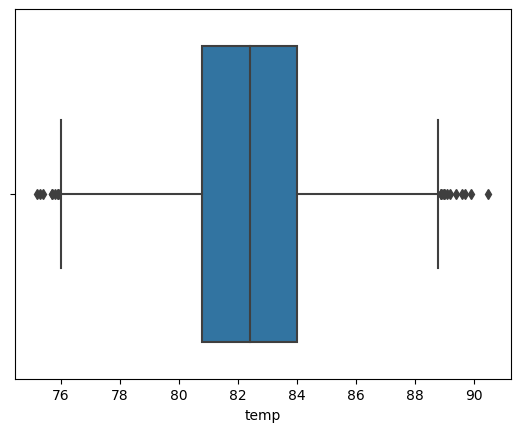

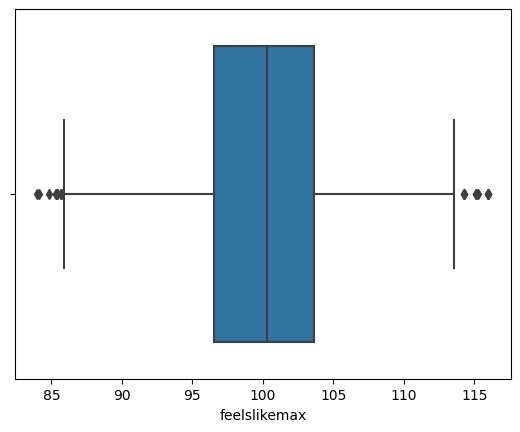

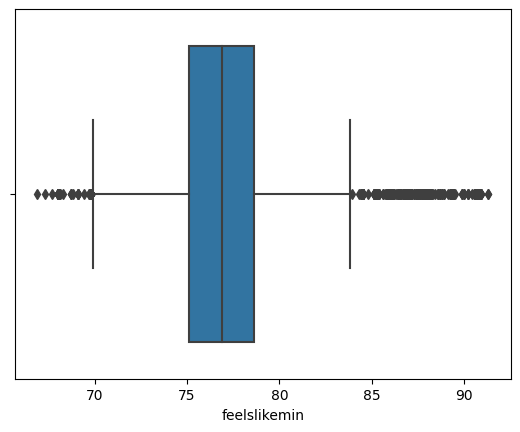

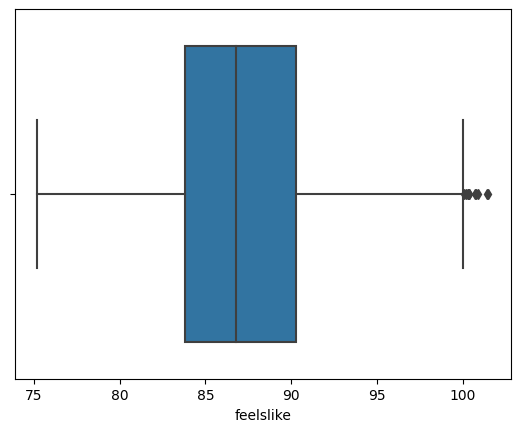

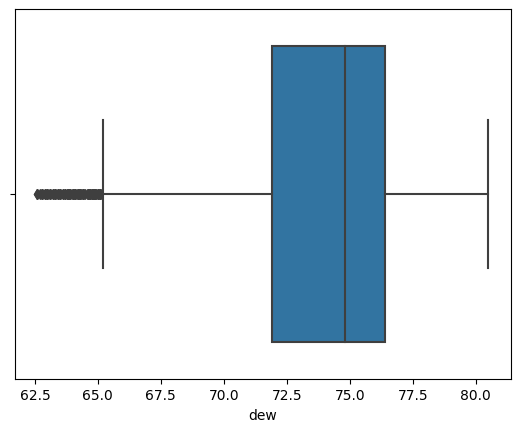

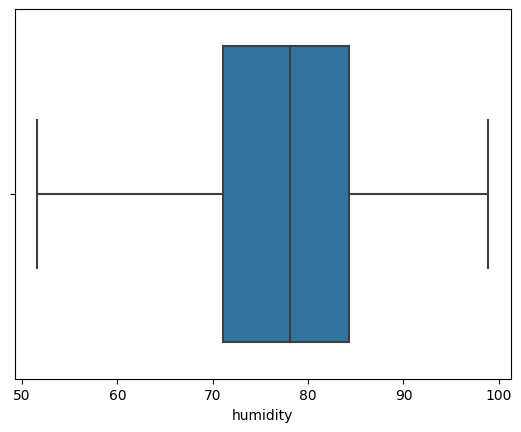

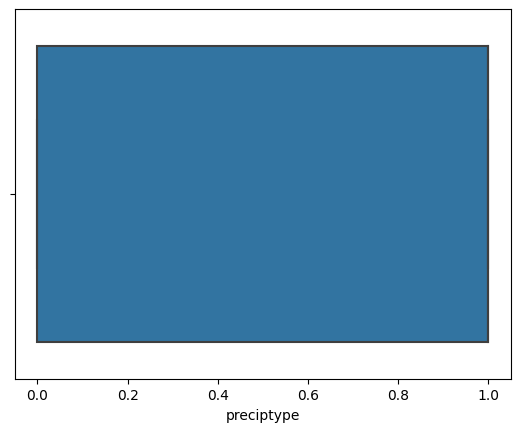

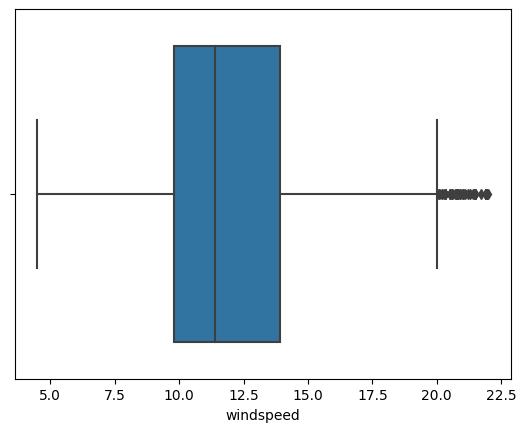

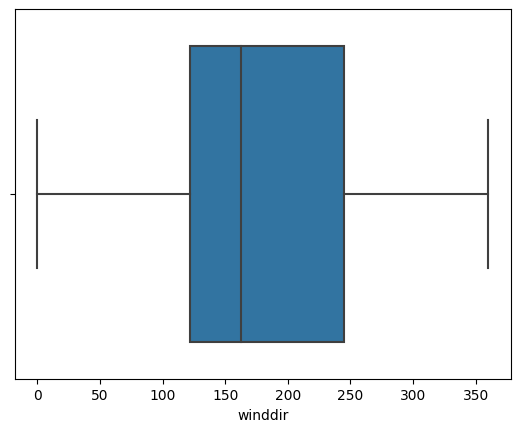

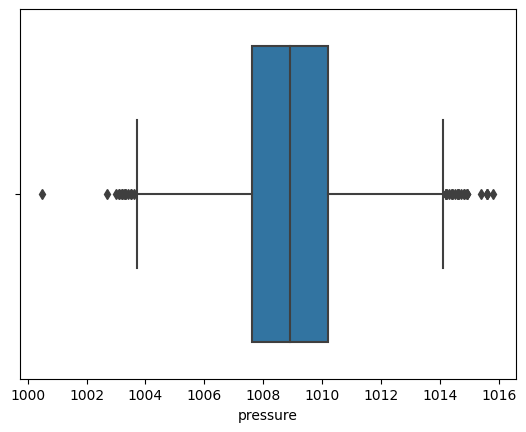

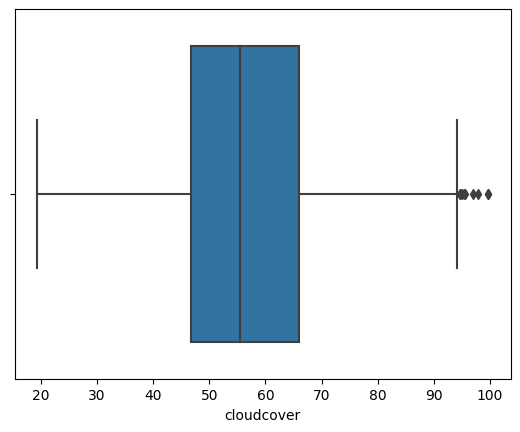

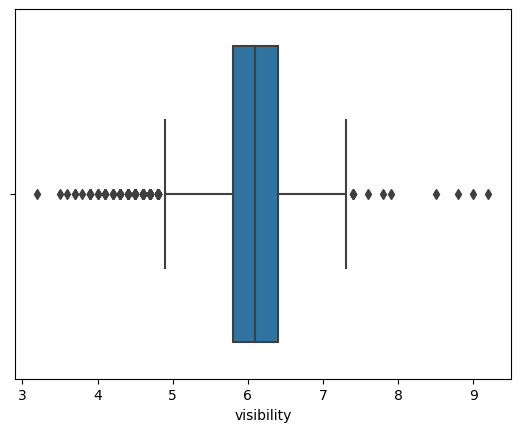

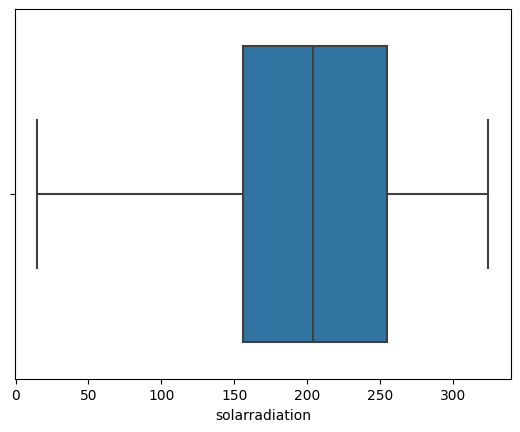

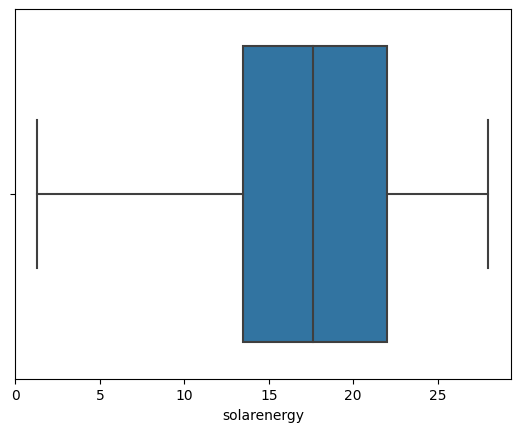

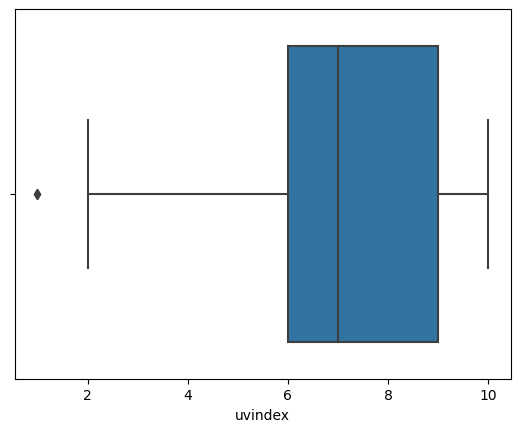

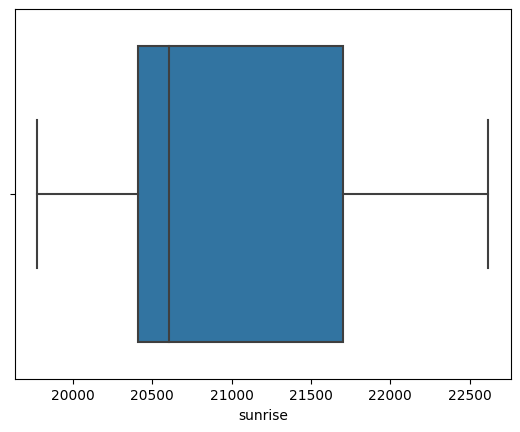

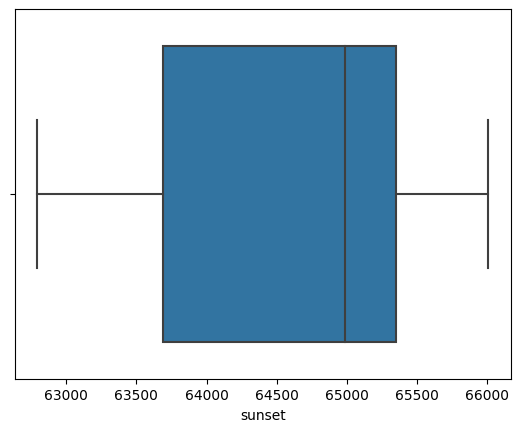

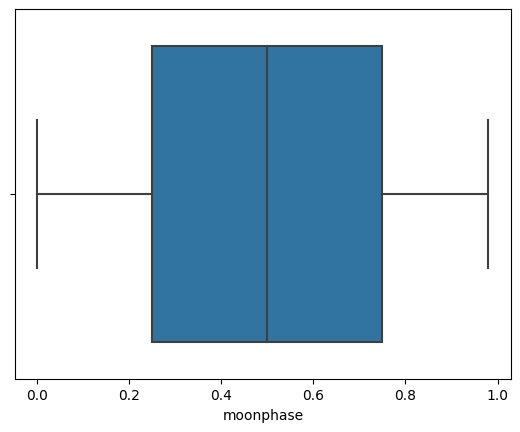

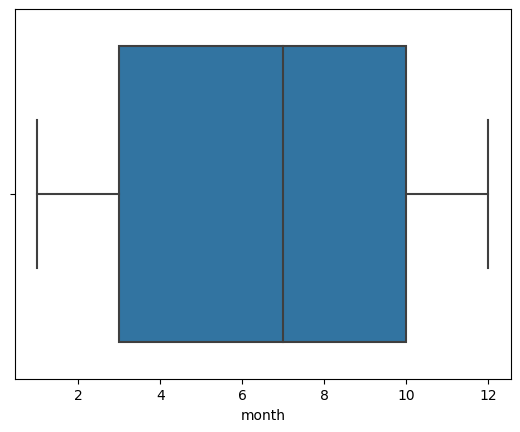

In [37]:
for col in numeric_cols:
    sns.boxplot(x = df[col])
    plt.show()

The boxplot diagrams of the features are more concentrated, with significantly fewer outliers compared to the original dataset.

# Imput missing values

In [38]:
missing_values_per_column = df.isnull().sum()

print(missing_values_per_column)

tempmax            0
tempmin            0
temp               0
feelslikemax       0
feelslikemin       0
feelslike          0
dew                0
humidity           0
preciptype         0
windspeed          0
winddir            0
pressure           1
cloudcover         0
visibility         0
solarradiation    96
solarenergy       96
uvindex           96
sunrise            0
sunset             0
moonphase          0
icon               0
month              0
dtype: int64


Using KNN imputer to impute missing values

In [52]:
k_neighbors = 3

df_imputed = df.drop(columns=['icon'])

knn_imputer = KNNImputer(n_neighbors=k_neighbors)

df_imputed = pd.DataFrame(knn_imputer.fit_transform(df_imputed), columns=df_imputed.columns)

df_imputed['icon'] = df.reset_index(drop=False)['icon']

print(df_imputed)

        tempmax    tempmin       temp  feelslikemax  feelslikemin  feelslike  \
0     87.900000  73.500000  78.900000    100.900000     73.500000  82.500000   
1     84.800000  75.300000  79.600000     94.000000     75.300000  82.700000   
2     84.500000  77.100000  80.500000     93.500000     77.100000  84.600000   
3     87.900000  74.600000  79.300000    100.200000     74.600000  82.400000   
4     89.700000  75.300000  80.900000    100.500000     75.300000  85.400000   
...         ...        ...        ...           ...           ...        ...   
4725  91.077956  76.202516  82.381496    100.058784     76.838366  87.184436   
4726  91.077956  76.202516  82.381496    100.058784     76.838366  87.184436   
4727  91.077956  76.202516  82.381496    100.058784     76.838366  87.184436   
4728  91.077956  76.202516  82.381496    100.058784     76.838366  87.184436   
4729  91.077956  76.202516  82.381496    100.058784     76.838366  87.184436   

            dew   humidity  preciptype 

In [54]:
missing_values_per_column = df_imputed.isnull().sum()

print(missing_values_per_column)

tempmax           0
tempmin           0
temp              0
feelslikemax      0
feelslikemin      0
feelslike         0
dew               0
humidity          0
preciptype        0
windspeed         0
winddir           0
pressure          0
cloudcover        0
visibility        0
solarradiation    0
solarenergy       0
uvindex           0
sunrise           0
sunset            0
moonphase         0
month             0
icon              0
dtype: int64


# Check multicollinearity

In [15]:
df_imputed.drop(columns=['icon']).corr(method="spearman")

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,preciptype,windspeed,...,pressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,month
tempmax,1.000000,0.460016,0.814620,0.500703,0.458740,0.639349,-0.067701,-0.544816,-0.226241,0.120670,...,0.102132,-0.489003,0.348509,0.390232,0.389825,0.346330,-0.107050,0.257120,0.014871,-0.344268
tempmin,0.460016,1.000000,0.773513,0.621291,0.999668,0.826505,0.449597,-0.078858,0.168078,0.181249,...,-0.255749,-0.036569,0.207298,0.012427,0.011886,-0.010389,-0.425841,0.352331,0.002603,-0.075760
temp,0.814620,0.773513,1.000000,0.596818,0.772961,0.908269,0.164622,-0.457510,-0.063955,0.102871,...,-0.045978,-0.370568,0.362122,0.267769,0.267247,0.228471,-0.259279,0.310386,0.006109,-0.214379
feelslikemax,0.500703,0.621291,0.596818,1.000000,0.623046,0.798345,0.728902,0.270039,0.353794,0.263732,...,-0.448444,0.123066,-0.018128,-0.175900,-0.176214,-0.204499,-0.670517,0.485297,-0.002233,0.052155
feelslikemin,0.458740,0.999668,0.772961,0.623046,1.000000,0.827259,0.454316,-0.075272,0.170918,0.181253,...,-0.257905,-0.034975,0.206306,0.009628,0.009095,-0.012980,-0.427080,0.353409,0.002102,-0.074512
feelslike,0.639349,0.826505,0.908269,0.798345,0.827259,1.000000,0.507388,-0.114095,0.174587,0.142433,...,-0.273479,-0.130611,0.197430,0.037243,0.036799,0.003688,-0.496072,0.397258,-0.001791,-0.051515
dew,-0.067701,0.449597,0.164622,0.728902,0.454316,0.507388,1.000000,0.758486,0.595112,0.184055,...,-0.616695,0.484983,-0.310520,-0.493876,-0.493866,-0.496702,-0.713890,0.357174,-0.007350,0.305837
humidity,-0.544816,-0.078858,-0.457510,0.270039,-0.075272,-0.114095,0.758486,1.000000,0.590804,0.113042,...,-0.529392,0.686312,-0.519026,-0.604379,-0.604080,-0.584165,-0.480210,0.105447,-0.015454,0.443455
preciptype,-0.226241,0.168078,-0.063955,0.353794,0.170918,0.174587,0.595112,0.590804,1.000000,0.126383,...,-0.461491,0.568221,-0.338157,-0.559738,-0.559709,-0.533149,-0.539058,0.200111,-0.015462,0.370297
windspeed,0.120670,0.181249,0.102871,0.263732,0.181253,0.142433,0.184055,0.113042,0.126383,1.000000,...,-0.302192,0.117656,0.222670,-0.071903,-0.072608,-0.096455,-0.273186,0.466928,-0.024228,-0.174130


In [ ]:
target = ['icon']
features = df_imputed.columns.drop(target)
X = df_imputed[features]
y = df_imputed[target]

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [ ]:
vif_data_scaled = pd.DataFrame()
vif_data_scaled["Feature"] = X.columns
vif_data_scaled["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print(vif_data_scaled.sort_values("VIF", ascending=False))

           Feature          VIF
14  solarradiation  2603.391626
15     solarenergy  2576.607950
7         humidity   199.029151
6              dew   198.161034
2             temp    90.082226
5        feelslike    39.251963
1          tempmin    14.555853
16         uvindex    12.569093
3     feelslikemax    10.211922
4     feelslikemin     9.956641
0          tempmax     9.361524
17         sunrise     3.960073
18          sunset     3.424845
20           month     3.072894
12      cloudcover     2.496552
11        pressure     2.115321
8       preciptype     2.106802
10         winddir     1.572783
13      visibility     1.558763
9        windspeed     1.497457
19       moonphase     1.003999


In [ ]:
high_vif_cols = vif_data_scaled[vif_data_scaled["VIF"] > 5]
print(high_vif_cols.sort_values("VIF", ascending=False))

           Feature          VIF
14  solarradiation  2603.391626
15     solarenergy  2576.607950
7         humidity   199.029151
6              dew   198.161034
2             temp    90.082226
5        feelslike    39.251963
1          tempmin    14.555853
16         uvindex    12.569093
3     feelslikemax    10.211922
4     feelslikemin     9.956641
0          tempmax     9.361524


Remove high VIF columns sequencely

In [ ]:
X = X.loc[:, X.columns != 'solarradiation']
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

vif_data_scaled = pd.DataFrame()
vif_data_scaled["Feature"] = X.columns
vif_data_scaled["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print(vif_data_scaled)

         Feature         VIF
0        tempmax    9.361347
1        tempmin   14.555840
2           temp   90.047713
3   feelslikemax   10.211922
4   feelslikemin    9.955881
5      feelslike   39.243913
6            dew  198.120730
7       humidity  198.996468
8     preciptype    2.106768
9      windspeed    1.497443
10       winddir    1.572222
11      pressure    2.113236
12    cloudcover    2.494242
13    visibility    1.558722
14   solarenergy   13.729307
15       uvindex   12.434143
16       sunrise    3.957704
17        sunset    3.420572
18     moonphase    1.003998
19         month    3.072243


In [ ]:
X = X.loc[:, X.columns != 'solarenergy']
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

vif_data_scaled = pd.DataFrame()
vif_data_scaled["Feature"] = X.columns
vif_data_scaled["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print(vif_data_scaled)

         Feature         VIF
0        tempmax    9.346061
1        tempmin   14.552664
2           temp   89.446798
3   feelslikemax   10.197495
4   feelslikemin    9.954534
5      feelslike   39.090364
6            dew  197.959752
7       humidity  198.642795
8     preciptype    2.049953
9      windspeed    1.497137
10       winddir    1.570959
11      pressure    2.109799
12    cloudcover    2.464546
13    visibility    1.558021
14       uvindex    1.774725
15       sunrise    3.919725
16        sunset    3.393763
17     moonphase    1.003799
18         month    3.068649


In [ ]:
X = X.loc[:, X.columns != 'humidity']
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

vif_data_scaled = pd.DataFrame()
vif_data_scaled["Feature"] = X.columns
vif_data_scaled["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print(vif_data_scaled)

         Feature        VIF
0        tempmax   9.058398
1        tempmin  13.762342
2           temp  38.554697
3   feelslikemax  10.195500
4   feelslikemin   9.590446
5      feelslike  33.871901
6            dew   9.325014
7     preciptype   2.049690
8      windspeed   1.491222
9        winddir   1.570955
10      pressure   2.106466
11    cloudcover   2.462822
12    visibility   1.506388
13       uvindex   1.774426
14       sunrise   3.888098
15        sunset   3.390771
16     moonphase   1.003797
17         month   3.063155


In [ ]:
X = X.loc[:, X.columns != 'temp']
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

vif_data_scaled = pd.DataFrame()
vif_data_scaled["Feature"] = X.columns
vif_data_scaled["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print(vif_data_scaled)

         Feature       VIF
0        tempmax  5.565591
1        tempmin  8.335026
2   feelslikemax  8.938145
3   feelslikemin  7.777016
4      feelslike  8.768694
5            dew  8.170381
6     preciptype  2.043941
7      windspeed  1.491216
8        winddir  1.570937
9       pressure  2.103655
10    cloudcover  2.461188
11    visibility  1.503804
12       uvindex  1.763468
13       sunrise  3.878622
14        sunset  3.389083
15     moonphase  1.003694
16         month  3.047174


In [ ]:
X = X.loc[:, X.columns != 'feelslike']
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

vif_data_scaled = pd.DataFrame()
vif_data_scaled["Feature"] = X.columns
vif_data_scaled["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print(vif_data_scaled)

         Feature       VIF
0        tempmax  5.012877
1        tempmin  8.109372
2   feelslikemax  8.427901
3   feelslikemin  7.105916
4            dew  7.805558
5     preciptype  2.039999
6      windspeed  1.414849
7        winddir  1.570061
8       pressure  2.103578
9     cloudcover  2.320640
10    visibility  1.430478
11       uvindex  1.763322
12       sunrise  3.860780
13        sunset  3.383624
14     moonphase  1.003571
15         month  3.042001


In [ ]:
X = X.loc[:, X.columns != 'feelslikemax']
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

vif_data_scaled = pd.DataFrame()
vif_data_scaled["Feature"] = X.columns
vif_data_scaled["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print(vif_data_scaled)

         Feature       VIF
0        tempmax  2.277190
1        tempmin  8.100561
2   feelslikemin  7.105907
3            dew  3.788121
4     preciptype  2.038851
5      windspeed  1.405464
6        winddir  1.567430
7       pressure  2.100293
8     cloudcover  2.319380
9     visibility  1.430458
10       uvindex  1.763202
11       sunrise  3.821605
12        sunset  3.327807
13     moonphase  1.003508
14         month  3.036892


In [ ]:
X = X.loc[:, X.columns != 'feelslikemin']
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

vif_data_scaled = pd.DataFrame()
vif_data_scaled["Feature"] = X.columns
vif_data_scaled["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print(vif_data_scaled)

       Feature       VIF
0      tempmax  2.274305
1      tempmin  2.176485
2          dew  3.776775
3   preciptype  2.020447
4    windspeed  1.400557
5      winddir  1.567402
6     pressure  2.097701
7   cloudcover  2.317517
8   visibility  1.428753
9      uvindex  1.762056
10     sunrise  3.792734
11      sunset  3.324943
12   moonphase  1.003415
13       month  3.022196


In [ ]:
df = df_imputed[X.columns]
df['label'] = df_imputed['icon']

df.to_csv('../data/processed_data.csv', index=False)

df.head()

<ipython-input-23-8c79868068de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df_imputed['icon']


,tempmax,tempmin,dew,preciptype,windspeed,winddir,pressure,cloudcover,visibility,uvindex,sunrise,sunset,moonphase,month,label
0,87.9,73.5,76.5,0.0,18.3,263.1,1005.5,87.9,5.6,5.2,20523.0,63977.0,0.27,9.0,partly-cloudy-day
1,84.8,75.3,75.7,0.0,13.9,258.8,1003.1,90.4,6.6,5.2,20520.0,63939.0,0.30,9.0,cloudy
2,84.5,77.1,76.2,0.0,16.1,251.4,1000.5,82.1,6.6,6.0,20518.0,63901.0,0.34,9.0,partly-cloudy-day
3,87.9,74.6,76.3,0.0,17.2,260.5,1002.7,90.0,5.7,7.8,20516.0,63864.0,0.37,9.0,partly-cloudy-day
4,89.7,75.3,76.3,0.0,12.8,234.3,1006.0,70.8,6.6,6.2,20514.0,63826.0,0.40,10.0,partly-cloudy-day


# Conclusion

- Removed or converted columns with high missing values or those that did not contribute significantly in terms of meaning.
- Removed extremed outliers.
- Imputed missing values using KNN
- Handling multicollinearity